# [ASSIGNMENT 3] IMAGE CLASSIFICATION BY CNN WITH CIFAR-10 DATASET 

## 1. Import and pre-processing data

### Import library

In [2]:
import tensorflow as tf
import numpy as np

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import datasets, layers, models
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

### Load and normalize the data

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

170508288/170498071 [==============================] - 4s 0us/step


### Verify the data

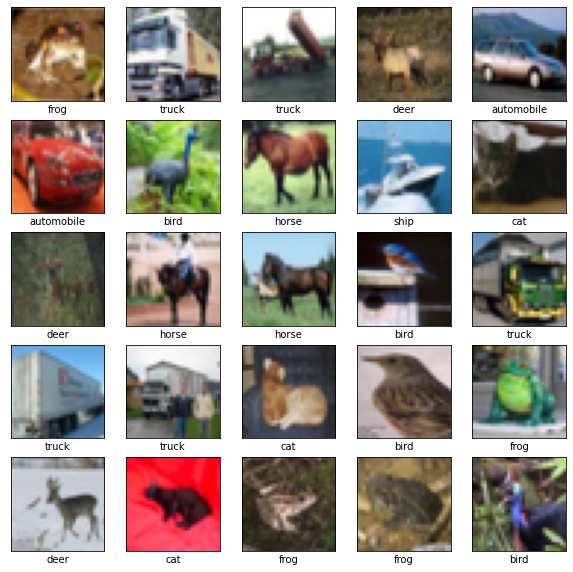

In [4]:
classname = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(classname[y_train[i][0]])
plt.show()


### Perform one hot encoding with classification task



In [5]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False)

y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)
print(y_train[0])
print(y_train_onehot[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## 2. Building model

### Function to build model and tune the number of layers (1 to 5)

In [ ]:
def cnn(num_layers):

  model = Sequential()

  if num_layers >= 1:
      model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))
      model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
      model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
      model.add(Dropout(0.3))
    
      if num_layers >= 2:
          model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))
          model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
          model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
          model.add(Dropout(0.3)) 
                  
          if num_layers >= 3:  
              model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))
              model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
              model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
              model.add(Dropout(0.3))
                      
              if num_layers >= 4:
                  model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))
                  model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same'))
                  model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
                  model.add(Dropout(0.3))
                          
                  if num_layers >= 5:
                      model.add(Conv2D(512, (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))
                      model.add(Conv2D(512, (3,3), activation = 'relu', padding = 'same'))
                      model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
                      model.add(Dropout(0.3))

  model.add(Flatten())
  model.add(Dense(1024, activation = 'relu'))
  model.add(Dropout(0.8))
  model.add(Dense(10, activation = 'softmax'))
  model.summary()

  loss = 'categorical_crossentropy'
  opt = tf.keras.optimizers.Adam(learning_rate=0.0009,beta_1=0.9, beta_2=0.999,epsilon=1e-07)
  metrics = ['accuracy']
  model.compile(loss=loss,
                optimizer=opt,
                metrics=metrics)
  print(model.summary())

  return model


## 3. Training model

In [ ]:
history_cnn = dict()

for i in range(5):
  print('Training CNN with {} convolutional layers'.format(i+1))
  save_best_model = ModelCheckpoint('/kaggle/working/best_model.{}convolutionallayers'.format(i+1),monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
  model =  cnn(i+1)
  history_cnn[i+1] = model.fit(x_train, y_train_onehot, batch_size = 250 , epochs = 100, validation_split = 0.2, callbacks=[save_best_model])

Training CNN with 1 convolutional layers
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 1024)              8389632   
               

### Plot and compare the result

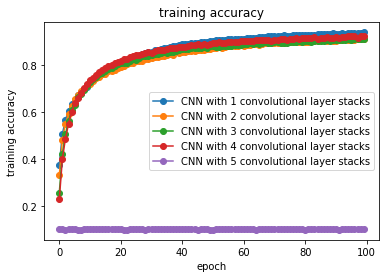

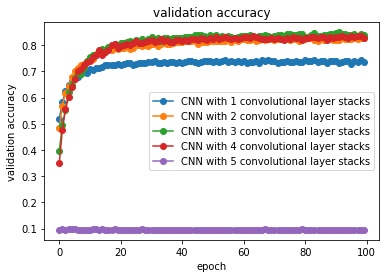

313/313 [==============================] - 1s 3ms/step - loss: 0.9954 - accuracy: 0.7362
Test accuracy for CNN with 1 convolutional layers: 0.7361999750137329
313/313 [==============================] - 1s 4ms/step - loss: 0.6156 - accuracy: 0.8136
Test accuracy for CNN with 2 convolutional layers: 0.8136000037193298
313/313 [==============================] - 2s 4ms/step - loss: 0.5919 - accuracy: 0.8375
Test accuracy for CNN with 3 convolutional layers: 0.8374999761581421
313/313 [==============================] - 2s 5ms/step - loss: 0.6964 - accuracy: 0.8168
Test accuracy for CNN with 4 convolutional layers: 0.8167999982833862
313/313 [==============================] - 2s 5ms/step - loss: 2.3026 - accuracy: 0.1000
Test accuracy for CNN with 5 convolutional layers: 0.10000000149011612


In [ ]:
# Plot training accuracy
for i in range(5):
  plt.plot(history_cnn[i+1].history['accuracy'], 'o-', label='CNN with {} convolutional layer stacks'.format(i+1))

plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

# Plot validation accuracy
for i in range(5):
  plt.plot(history_cnn[i+1].history['val_accuracy'], 'o-', label='CNN with {} convolutional layer stacks'.format(i+1))
  
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
for i in range(5):
  saved_model = load_model('/kaggle/working/best_model.{}convolutionallayers'.format(i+1))
  scores = saved_model.evaluate(x_test, y_test_onehot, verbose=1)
  print('Test accuracy for CNN with {} convolutional layers: {}'.format(i+1, scores[1]))



#### The highest accuracy is from the model with 3 convolutional layers block

#### We achieve the accuracy of 83.75% with 3 convo blocks, and will be using this for further tasks.

In [ ]:
#Make some predictions:
model = load_model('/kaggle/working/best_model.3convolutionallayers')

Test some predictions

## 4. Implementing with differential privacy

In [7]:
!pip install tensorflow_privacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 9.5 MB/s 
     |████████████████████████████████| 5.7 MB 33.3 MB/s 
     |████████████████████████████████| 25.9 MB 1.2 MB/s 
     |████████████████████████████████| 53 kB 2.7 MB/s 
     |████████████████████████████████| 11.5 MB 36.7 MB/s 
     |████████████████████████████████| 9.5 MB 63.2 MB/s 
     |████████████████████████████████| 4.2 MB 70.7 MB/s 
     |████████████████████████████████| 462 kB 70.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.16.0
    Uninstalling tensorflow-probability-0.16.0:
      Successfully uninstalled tensorflow-probability-0.16.0
  Attempting uninstall: tensorflow-datasets
    Found existing installat

In [8]:
from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy
from tensorflow_privacy.privacy.optimizers.dp_optimizer import DPGradientDescentGaussianOptimizer, DPAdamGaussianOptimizer


In [6]:
#We redefined the 3 convo blocks model for faster computation (since colab reset each time we use it so re-trained 5 models and load it takes a lot of time and redefining the chosen modle is fasterc)

model1 = Sequential()
model1.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))
model1.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
model1.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model1.add(Dropout(0.3))
model1.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))
model1.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model1.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model1.add(Dropout(0.3)) 
model1.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3)))
model1.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model1.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
model1.add(Dropout(0.3))
model1.add(Flatten())
model1.add(Dense(1024, activation = 'relu'))
model1.add(Dropout(0.8))
model1.add(Dense(10, activation = 'softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

##### Modified optimizer for DP

In [9]:
"""
This part is to modify the optimizer for the DP library of the tensorflow because it cannot run on the tensorflow 2.0+. 
This is the recognition credit for the notebook:
https://colab.research.google.com/github/ricardocarvalhods/dpcgan/blob/master/DP_CGAN_MNIST.ipynb#scrollTo=hOBQELw7mo9Z&line=21&uniqifier=1
"""
from absl import logging
import collections

from tensorflow_privacy.privacy.dp_query import gaussian_query

def make_optimizer_class(cls):
  """Constructs a DP optimizer class from an existing one."""
  parent_code = tf.compat.v1.train.Optimizer.compute_gradients.__code__
  child_code = cls.compute_gradients.__code__
  GATE_OP = tf.compat.v1.train.Optimizer.GATE_OP  # pylint: disable=invalid-name
  if child_code is not parent_code:
    logging.warning(
        'WARNING: Calling make_optimizer_class() on class %s that overrides '
        'method compute_gradients(). Check to ensure that '
        'make_optimizer_class() does not interfere with overridden version.',
        cls.__name__)

  class DPOptimizerClass(cls):
    """Differentially private subclass of given class cls."""

    _GlobalState = collections.namedtuple(
      '_GlobalState', ['l2_norm_clip', 'stddev'])
    
    def __init__(
        self,
        dp_sum_query,
        num_microbatches=None,
        unroll_microbatches=False,
        *args,  # pylint: disable=keyword-arg-before-vararg, g-doc-args
        **kwargs):
      """Initialize the DPOptimizerClass.

      Args:
        dp_sum_query: DPQuery object, specifying differential privacy
          mechanism to use.
        num_microbatches: How many microbatches into which the minibatch is
          split. If None, will default to the size of the minibatch, and
          per-example gradients will be computed.
        unroll_microbatches: If true, processes microbatches within a Python
          loop instead of a tf.while_loop. Can be used if using a tf.while_loop
          raises an exception.
      """
      super(DPOptimizerClass, self).__init__(*args, **kwargs)
      self._dp_sum_query = dp_sum_query
      self._num_microbatches = num_microbatches
      self._global_state = self._dp_sum_query.initial_global_state()
      # TODO(b/122613513): Set unroll_microbatches=True to avoid this bug.
      # Beware: When num_microbatches is large (>100), enabling this parameter
      # may cause an OOM error.
      self._unroll_microbatches = unroll_microbatches

    def compute_gradients(self,
                          loss,
                          var_list,
                          gate_gradients=GATE_OP,
                          aggregation_method=None,
                          colocate_gradients_with_ops=False,
                          grad_loss=None,
                          gradient_tape=None,
                          curr_noise_mult=0,
                          curr_norm_clip=1):

      self._dp_sum_query = gaussian_query.GaussianSumQuery(curr_norm_clip, 
                                                           curr_norm_clip*curr_noise_mult)
      self._global_state = self._dp_sum_query.make_global_state(curr_norm_clip, 
                                                                curr_norm_clip*curr_noise_mult)
      

      # TF is running in Eager mode, check we received a vanilla tape.
      if not gradient_tape:
        raise ValueError('When in Eager mode, a tape needs to be passed.')

      vector_loss = loss()
      if self._num_microbatches is None:
        self._num_microbatches = tf.shape(input=vector_loss)[0]
      sample_state = self._dp_sum_query.initial_sample_state(var_list)
      microbatches_losses = tf.reshape(vector_loss, [self._num_microbatches, -1])
      sample_params = (self._dp_sum_query.derive_sample_params(self._global_state))

      def process_microbatch(i, sample_state):
        """Process one microbatch (record) with privacy helper."""
        microbatch_loss = tf.reduce_mean(input_tensor=tf.gather(microbatches_losses, [i]))
        grads = gradient_tape.gradient(microbatch_loss, var_list)
        sample_state = self._dp_sum_query.accumulate_record(sample_params, sample_state, grads)
        return sample_state
    
      for idx in range(self._num_microbatches):
        sample_state = process_microbatch(idx, sample_state)

      if curr_noise_mult > 0:
        grad_sums, self._global_state = (self._dp_sum_query.get_noised_result(sample_state, self._global_state))
      else:
        grad_sums = sample_state

      def normalize(v):
        return v / tf.cast(self._num_microbatches, tf.float32)

      final_grads = tf.nest.map_structure(normalize, grad_sums)
      grads_and_vars = final_grads#list(zip(final_grads, var_list))
    
      return grads_and_vars

  return DPOptimizerClass


def make_gaussian_optimizer_class(cls):
  """Constructs a DP optimizer with Gaussian averaging of updates."""

  class DPGaussianOptimizerClass(make_optimizer_class(cls)):
    """DP subclass of given class cls using Gaussian averaging."""

    def __init__(
        self,
        l2_norm_clip,
        noise_multiplier,
        num_microbatches=None,
        ledger=None,
        unroll_microbatches=False,
        *args,  # pylint: disable=keyword-arg-before-vararg
        **kwargs):
      dp_sum_query = gaussian_query.GaussianSumQuery(
          l2_norm_clip, l2_norm_clip * noise_multiplier)

      if ledger:
        dp_sum_query = privacy_ledger.QueryWithLedger(dp_sum_query,
                                                      ledger=ledger)

      super(DPGaussianOptimizerClass, self).__init__(
          dp_sum_query,
          num_microbatches,
          unroll_microbatches,
          *args,
          **kwargs)

    @property
    def ledger(self):
      return self._dp_sum_query.ledger

  return DPGaussianOptimizerClass

In [10]:
GradientDescentOptimizer = tf.compat.v1.train.GradientDescentOptimizer
DPAdamGaussianOptimizer_new = make_gaussian_optimizer_class(tf.compat.v1.train.AdamOptimizer)

The method we are using here is injecting noise into the gradient, which here is in the Adam optimizer. The default arguments are still beta_1=0.9, beta_2=0.999, epsilon=1e-08.

The highest Euclidean norm of each individual gradient computed on an individual training example from a minibatch is the l2_norm_clip parameter. The optimizer's sensitivity to individual training points is limited by this setting.

Following that, the noise_multiplier parameter is used to regulate how much noise is sampled and added to gradients before the optimizer applies them. In general, greater noise equals more privacy (often, but not necessarily, at the expense of lower utility).

In fact, clipping gradients on a per-example basis can hurt our approach's speed because calculations can't be batched and parallelized at the granularity of minibatches. As a result, by breaking each minibatch into many microbatches, we introduce a new granularity. Instead of cutting gradients on a per-example basis, we clip them in microbatch basis.

In [11]:
l2_norm_clip = 1.5
noise_multiplier = 5
num_microbatches = 250
learning_rate = 0.0009

optimizer_new = DPAdamGaussianOptimizer_new(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=num_microbatches,
    learning_rate=learning_rate)
loss = tf.keras.losses.CategoricalCrossentropy(
    from_logits=True, reduction=tf.losses.Reduction.NONE)

#loss = 'categorical_crossentropy'
#opt = tf.keras.optimizers.Adam(learning_rate=0.0009,beta_1=0.9, beta_2=0.999,epsilon=1e-07)
metrics = ['accuracy']
model1.compile(loss=loss,
                optimizer=optimizer_new,
                metrics=metrics)

In [12]:
his = model1.fit(x_train, y_train_onehot, batch_size = 250 , epochs = 100, validation_split = 0.2)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


160/160 [==============================] - 17s 28ms/step - loss: 1.9973 - accuracy: 0.2482 - val_loss: 1.6235 - val_accuracy: 0.3955
Epoch 2/100
160/160 [==============================] - 4s 24ms/step - loss: 1.5427 - accuracy: 0.4276 - val_loss: 1.3685 - val_accuracy: 0.4998
Epoch 3/100
160/160 [==============================] - 4s 24ms/step - loss: 1.3148 - accuracy: 0.5244 - val_loss: 1.1169 - val_accuracy: 0.5975
Epoch 4/100
160/160 [==============================] - 4s 24ms/step - loss: 1.1825 - accuracy: 0.5777 - val_loss: 1.0102 - val_accuracy: 0.6369
Epoch 5/100
160/160 [==============================] - 4s 24ms/step - loss: 1.0727 - accuracy: 0.6181 - val_loss: 0.9292 - val_accuracy: 0.6678
Epoch 6/100
160/160 [==============================] - 4s 24ms/step - loss: 0.9975 - accuracy: 0.6468 - val_loss: 0.8563 - val_accuracy: 0.6960
Epoch 7/100
160/160 [==============================] - 4s 24ms/step - loss: 0.9346 - accuracy: 0.6696 - val_loss: 0.8053 - val_accuracy: 0.7113
Epo

313/313 [==============================] - 1s 5ms/step - loss: 0.5906 - accuracy: 0.8319
Test accuracy for CNN with 3 convolutional layers and DP: {} 0.8319000005722046


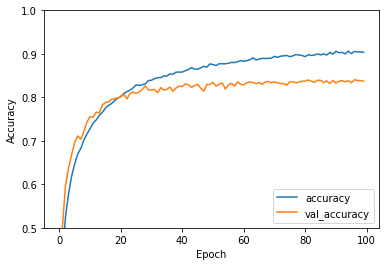

In [14]:
plt.plot(his.history['accuracy'], label='accuracy')
plt.plot(his.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

scores = model1.evaluate(x_test, y_test_onehot, verbose=1)
print('Test accuracy for CNN with 3 convolutional layers and DP: {}', scores[1])

In [15]:
compute_dp_sgd_privacy.compute_dp_sgd_privacy(n=50000, batch_size=250, noise_multiplier=noise_multiplier, epochs=100, delta=1e-5)

DP-SGD with sampling rate = 0.5% and noise_multiplier = 5 iterated over 20000 steps satisfies differential privacy with eps = 0.553 and delta = 1e-05.
The optimal RDP order is 29.0.


(0.5533580796345685, 29.0)

We could see that the privacy is preserved with this method with the epsilon is 0.55 (parameter to show that the guarantee of the privacy, the smaller it is, the higher the privacy)  and the accuracy is not changed much 83.2% compared to 83.75%.

Demo and test some prediction.

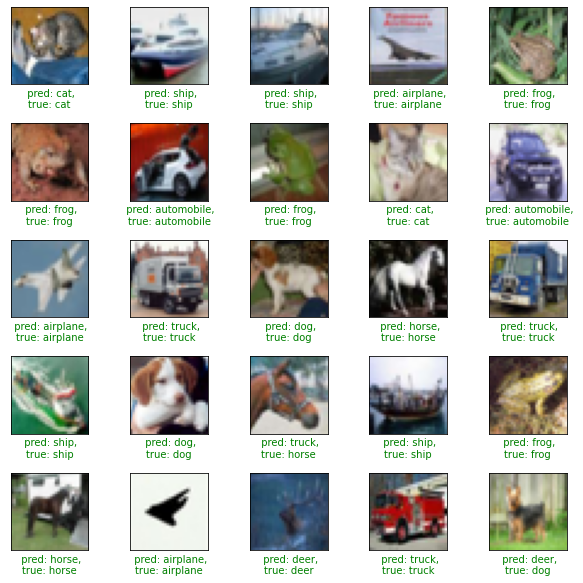

In [46]:

pred = model1.predict(x_test)
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xlabel(f"  pred: {classname[np.argmax(pred[i])]}, \ntrue: {classname[y_test[i][0]]}" ,fontdict={"color":"green"})
    plt.imshow(x_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
plt.show()